## 第五章 非线性分类器

### 一、分段线性判别函数

分段线性判别函数的思想时把每个类$\omega_i$分为$l_i$个子类$\omega_i^1, \omega_i^2, \cdots, \omega_i^{l_i}$，然后把这些子类通过线性分类器分别进行判别。

首先导包，生成数据

X是样本矩阵，每一行是一个样本。

real_class是样本的真实类别，共有两类，用1，-1表示。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.r_[
    np.random.randn(20, 2) + [-3.0, -3.0],
    np.random.randn(20, 2) + [3.0, 3.0],
    np.random.randn(20, 2) + [-3.0, 3.0],
    np.random.randn(60, 2) + [2.5, -2.5],
]
real_class = 60 * [1] + 60 * [-1]

print(X)
print(real_class)

[[-3.11325828 -4.59641454]
 [-3.04086167 -4.76138211]
 [-3.5193688  -2.84094792]
 [-2.92421586 -1.63973735]
 [-3.7115574  -2.57557309]
 [-4.07405343 -2.29521374]
 [-3.60612759 -3.78281399]
 [-2.14130824 -3.57563695]
 [-4.75813869 -4.24930052]
 [-2.92114623 -3.21344285]
 [-3.77858941 -1.51934542]
 [-1.29761102 -3.13704169]
 [-4.25939595 -1.97965072]
 [-3.13399585 -3.11430604]
 [-3.54343045 -2.57147058]
 [-2.75155252 -3.75618503]
 [-0.89565772 -2.87209046]
 [-4.85811272 -3.51760001]
 [-1.57771702 -2.99513265]
 [-4.86647116 -2.76154421]
 [ 3.0477958   4.31809839]
 [ 3.81075247  3.38806918]
 [ 3.09722384  5.73657845]
 [ 3.53786759  3.06750496]
 [ 3.76540659  1.44653057]
 [ 2.62320466  2.86038006]
 [ 2.6180855   2.83569498]
 [ 3.45895083  2.07923367]
 [ 2.89629222  2.67297668]
 [ 3.76271036  3.61094996]
 [ 4.69892358  2.34164903]
 [ 2.28502629  2.32429062]
 [ 3.34527579  1.68840282]
 [ 1.97481107  2.44816642]
 [ 3.72881535  4.73010061]
 [ 3.54680199  1.91337547]
 [ 3.91649903  3.23102615]
 

下面生成图像，显然1类由三个线性可分的子类构成，-1类由一个类构成

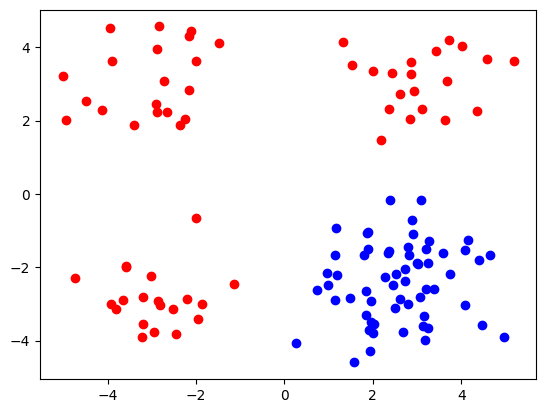

In [2]:
for i in range(120):
    if real_class[i] == -1:
        plt.scatter(X[i][0], X[i][1], c='b')
    else:
        plt.scatter(X[i][0], X[i][1], c='r')

plt.show()

#### 1. 分段线性距离分类器

这个分类器的思想就是算出每个子类$\omega_i^l$的均值$\mathbf{m}_i^l$，然后比较样本到均值的距离$||\mathbf{x} - \mathbf{m}_i^l||$，找最近的类别作为该样本的分类。这个算法思想非常简单，我就不写了。

#### 2. 一般的分段线性判别函数

这个分类器的思想是划分出子类之后，把每个子类的线性判别函数$g_i^l(\mathbf{y}) = \boldsymbol{\alpha}_i^l\cdot\mathbf{y}$算出来，然后根据判别函数进行分类，判别函数数值最大的就是样本所在的类。（这里的$\mathbf{y}$是增广后的样本，参见上一章）。

现在的核心问题是如何划分子类，书上给出了三种方法。

第一种是根据经验人为划分，或者可以用聚类算法划分。

第二种是边求权向量$\boldsymbol{\alpha_i^l}$边划分，算法如下：

1. 给定每个类别的子类数目（人为猜的），并且初始化每个子类的权向量$\boldsymbol{\alpha}_i^l$（用小的随机数即可）
2. 考察一个属于$\omega_j$类的训练样本$\mathbf{y}$，找出$\omega_j$类的子类中线性判别函数（$\boldsymbol{\alpha}_j^m\cdot\mathbf{y}$）的值最大的子类，假设是第$m$个子类
3. 如果刚求出的这个最大的线性判别函数的值比**其他所有类的所有子类**的线性判别函数的值**都大**，即$\boldsymbol{\alpha}_j^m \cdot\mathbf{y}>\boldsymbol{\alpha}_i^l\cdot \mathbf{y}, \forall i = 1,\cdots, c, i \neq j, l = 1, \cdots, l_i$，说明当前样本没有被错分，那么考察下一个样本
4. 否则就更新两个子类的权值。更新的两个子类有说法，要特别注意：更新的是**当前样本所属的类别的线性判别函数值最大的子类**和**当前样本被错分的类别的线性判别函数值最大的子类**。更新规则如下：

$$\begin{align}
\boldsymbol{\alpha}_j^m &+= \rho\mathbf{y}\\
\boldsymbol{\alpha}_i^n &-= \rho\mathbf{y}\\
\end{align}$$
$$\begin{align}
& \omega_j是当前样本属于的类\\
& \omega_i是当前样本被错分的类\\
& 即\boldsymbol{\alpha}_j^m \cdot\mathbf{y}\leqslant\boldsymbol{\alpha}_i^n\cdot \mathbf{y}\\
& m是\omega_j中线性判别函数最大的子类序号\\
& n是\omega_i中线性判别函数最大的子类序号\\
\end{align}$$

对于线性不可分的情况，可以使训练步长$\rho$逐渐变小来使算法强制收敛。（书里也没说具体怎么变小）

前面给出的数据集对于每个子类都是线性可分的，所以下面的算法里把$\rho$设为1了。

这种方法没有人为的划分子类，只是指定了子类的数量，样本属于哪个子类其实是自动划分的

求权向量实现代码如下：

In [0]:
def augment_matrix(_X: np.ndarray) -> np.ndarray:
    """
    将样本X矩阵增广为Y
    :param _X: 原样本矩阵
    :return: 增广后的样本矩阵
    """
    return np.concatenate((np.ones((_X.shape[0], 1)), _X), 1)

def get_alpha_piecewise_linear(_X: list[np.ndarray], _subclass_number: list[int]) -> (list[np.ndarray], int):
    """
    计算出每个子类的权向量
    :param _X: 每个类别的样本矩阵列表（增广前） _X[i]表示第i类的样本矩阵
    :param _subclass_number: 每个类别分出来的子类数量（一维向量） _subclass_number[i] = j表示第i类有j个子类
    :return: 每个子类的权向量数组 return[i][j]表示第i类的第j个子类的权向量
    """
    # 先求出每个类别样本的增广矩阵
    _Y: list[np.ndarray] = []
    N = 0  # 样本总数
    for _Xi in _X:
        _Y.append(augment_matrix(_Xi))
        N += _Y[-1].shape[0]

    d = _Y[0].shape[1]  # 样本维数
    c = len(_Y)         # 种类数量

    # 初始化权向量列表（随机数）
    _alphas: list[np.ndarray] = []
    for i in range(c):
        _alphas.append(np.random.randn(_subclass_number[i], d))

    # 下面开始考察每一个样本
    _iters = 0
    i, j, n = 0, 0, 0
    while n < N:
        if j >= _Y[i].shape[0]:
            i += 1
            j = 0
            if i >= c:
                i = 0
        # 当前考察的样本属于第i类
        max_g_of_right_class_value = -9999999
        max_g_of_right_class_index = 0
        g = _Y[i][j] @ _alphas[i].T
        for k in range(_subclass_number[i]):
            if g[k] > max_g_of_right_class_value:
                max_g_of_right_class_index = k
                max_g_of_right_class_value = g[k]

        # 考察每一个除了i之外的类别，计算判别函数，比较是否分类错误
        for k in range(c):
            if k == i:
                continue
            max_g_of_wrong_class_value = -9999999
            max_g_of_wrong_class_index = 0
            g = _Y[i][j] @ _alphas[k].T
            for l in range(_subclass_number[k]):
                if g[l] > max_g_of_wrong_class_value:
                    max_g_of_wrong_class_value = g[l]
                    max_g_of_wrong_class_index = l
            if max_g_of_wrong_class_value >= max_g_of_right_class_value:
                # 如果分类错误，则要更新权向量
                n = -1
                _iters += 1
                _alphas[i][max_g_of_right_class_index] += _Y[i][j]
                _alphas[k][max_g_of_wrong_class_index] -= _Y[i][j]
                break
            if _iters >= 100000:
                raise Exception('迭代100000次还不收敛，数据可能不是线性可分的')
        n += 1
        j += 1
    return _alphas, _iters

In [23]:
alphas, iters = get_alpha_piecewise_linear([X[:60], X[60:]], [3, 1])
print("第一类的所有子类的权向量（每一行是一个权向量）：\n", alphas[0])
print("第二类的所有子类的权向量（每一行是一个权向量）：\n", alphas[1])
print("迭代次数：", iters)

第一类的所有子类的权向量（每一行是一个权向量）：
 [[ 1.01848496e+00 -8.15113173e+00 -4.12926837e+00]
 [ 2.54386312e-01 -4.02457777e-01 -3.15953573e-03]
 [ 9.42934212e-01  1.35783124e+00  1.20361148e+01]]
第二类的所有子类的权向量（每一行是一个权向量）：
 [[-1.32262581  6.66700246 -6.23387516]]
迭代次数： 13


分类就比较好写了，直接计算所有类的所有子类的判别函数，找出最大的，判断样本属于最大的判别函数的类别

In [28]:
g_matrix = augment_matrix(X) @ np.concatenate([alphas[0], alphas[1]]).T
ans_piecewise_linear = []  # 最终的两类分类结果
ans_subclass = []          # 这个数组记录了样本分类到了哪个子类

# 找出最大的判别函数
for row in g_matrix:
    maxn = -99999
    subclass_of_this_sample = 0
    for i, g in enumerate(row):
        if maxn < g:
            subclass_of_this_sample = i
            maxn = g
    ans_subclass.append(subclass_of_this_sample)

print("这个数组显示了每个样本被分到了哪个子类（0，1，2是第一类的子类，3是第二类的子类）\n", ans_subclass)

# 接下来求出最终的分类结果

for sample in ans_subclass:
    if sample < 3:
        ans_piecewise_linear.append(1)
    else:
        ans_piecewise_linear.append(-1)

ans_piecewise_linear = np.array(ans_piecewise_linear)
print("最终分类结果：", ans_piecewise_linear)
print("正确率：", 1 - np.sum(abs(ans_piecewise_linear - real_class)) / 2 / X.shape[0])


这个数组显示了每个样本被分到了哪个子类（0，1，2是第一类的子类，3是第二类的子类）
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
最终分类结果： [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
正确率： 1.0


通过上面的结果我们可以明显看出，虽然我的数据生成的时候有意的把第一类分成了三个线性可分的子类（每20个数据属于一个子类），但是由于上面的算法是自动划分子类，最终第一大类的样本并没有像预期那样，均匀的划分为三个子类。但是这并不影响最终结果的正确性。

第三种是分治的思想，通过分类树来一步一步进行。每次都把当前分类的部分用两类线性判别算法分出来，最后形成一棵分类的二叉树。
这个方法书上只简单的介绍了一下，而且实际操作中会有很多问题要解决。另外根据我的估算就算实现了这个算法效果也不好，会有非常严重的过拟合问题。所以我就不在这个算法上浪费时间了。

### 二. 二次判别函数

书上就简单提了一下，总体思想就是样本到均值的马氏距离的平方和固定阈值的比较。书中连阈值怎么求都没解释，这节也可以略过。

### 三、多层感知机神经网络

这个算法吴恩达的网课里面Course 2里面讲了，看不懂书可以去看看他的课，讲的很清楚。下面实现的神经网络的数据也用的吴恩达网课里面的。

#### 1. 感知机神经网络的结构

第$1$层是输入层，输入层每个神经元对应样本的一个维度的数值（$n$维样本的输入层有$n$个神经元）。

最后一层是输出层，假设有$m$个神经元（具体有多少个需要根据实际问题来定）。

中间层是隐藏层，每层有多少个神经元、共有多少隐藏层是神经网络模型研究的主要内容。

运算时，先根据前向传播(forward propagation)算出实际输出，再根据反向传播(back propagation)逐层求导进行梯度下降。

#### 2. 前向传播和反向传播

前向传播很好理解，就是一层一层算出每个神经元的输出，最终得到结果。

关于反向传播书中解释的非常不清楚，只是给了文字描述和最终的公式，没有中间的推导。吴恩达的网课干脆就没说反向传播怎么求，直接用Tensorflow。

我看了这个视频[[5分钟深度学习] #02 反向传播算法](https://www.bilibili.com/video/BV1yG411x7Cc/?spm_id_from=333.880.my_history.page.click&vd_source=1f794c2cb7986b517be16024bfd2e263)，再自己推导了一下才理解反向传播到底是怎么回事。

反向传播其实就是对于每一层都求**输出层的输出**对**当前层的权向量**的偏导数，根据这个偏导数对当前层的权向量进行梯度下降。这个偏导数具体的求法就利用了求导的链式法则，可以用当前层后面的所有层的偏导数求出这一层的偏导数，有一个累加的过程。

这个偏导数可以再次拆开，变成对于每一层都求**下一层的输出**对**当前层的权向量**的偏导数，由于求导的链式法则，很容易可以推出这个和上面的偏导数是等价的。那么我们根据这个偏导数对每一层的权向量进行梯度下降，最终就可以把误差传播回输入层。

转化为公式就是书中96页的公式$(5-27)$。至于这个公式里面的$x_j^l(1-x_j^l)$是怎么来的，是因为书中所有的神经元的激活函数都是sigmoid函数，对$y = sigmoid(x)$进行求导，结果就是$y' = y(y - 1)$；算法是梯度下降，所以还要加个负号。

书上的反向传播的公式非常非常难理解，一定要手动画一个网络，把各种$i,j,k$序号带入到公式里面，手算一边，这样才能理解这些公式的含义。

#### 3. 算法实现

1. 确定神经网络结构（几层，多少神经元），然后用**小随机数**初始化权值
2. 从训练样本中按随机顺序找一个样本（输出层）$\mathbf{x} = [x_1, x_2, \cdots, x_n]^T$，这里的样本是增广过的。也就是在原来的维数基础上加一个维度，并且这个维度设为常量$1$。我们假设他的期望输出（输出层）是$\mathbf{d} = [d_1,d_2,\cdots, d_m]^T$。
3. 计算当前样本前向传播的最终输出（很奇怪书上的公式为什么不用向量表示，我这里用向量写了一下）

$$\begin{align}
\mathbf{x}^l &=  f((\mathbf{W}^{l})^T\mathbf{x}^{l-1})\\
&\mathbf{W}^l的第i列是第l层的第i个神经元的权向量,\mathbf{x}^l表示第l层输出\\
最终结果\mathbf{y} &= f((\mathbf{W}^{输出层})^T\mathbf{x}^{输出层的上一层})\\
\mathbf{y} &= \mathbf{x}^{输出层}\\
\mathbf{x}^0 &= 原始样本\\
f(\mathbf{x}) &= \frac{1}{1+e^{-\mathbf{x}}}
\end{align}$$

4. 通过反向传播更新每个神经元的权值（反向传播的公式也被我改成了向量版本）

先特别解释一下引入的运算规则：两个$n$维向量$\mathbf{x}*\mathbf{y} = [x_1y_1, x_2y_2, \cdots, x_ny_n]^T$

$$\begin{align}
\mathbf{w}_j^l &= \mathbf{w}_j^l + \Delta\mathbf{w}_j^l \quad, \mathbf{w}_j^l表示第l层的第j个神经元的权向量\\
\Delta\mathbf{w}_j^l &= \eta\delta_j^l\mathbf{x}^{l-1} \quad, \delta_j^l表示第l层的第j个神经元的\delta 值\\
\boldsymbol{\delta}^l &= [\delta_1^l, \delta_2^l,\cdots, \delta_{n_l}]^T\quad, 即每一层所有\delta 值构成的向量\\
\boldsymbol{\delta}^{输出层} &= \mathbf{y}*(1-\mathbf{y})*(\mathbf{d}-\mathbf{y})\\
\delta_j^l &= x_j^l(1-x_j^l)\mathbf{w'}_j^{l+1}\boldsymbol{\delta}^{l+1} \quad, 注意这里\mathbf{w'}和上面的\mathbf{w}的区别：\\
&这里的\mathbf{w'}_j^{l+1}是\mathbf{W}^{l+1}的第j行（l+1层中每个神经元关于第l层的第j个神经元输出的权值）\\
&而\mathbf{w}_j^l是\mathbf{W}^l的第j列（一个神经元的权向量）\\
\end{align}$$
接下来还可以化简$\boldsymbol{\delta}^l$用矩阵表示:

$$
\boldsymbol{\delta}^l = \mathbf{x}^l * (1-\mathbf{x}^l) * (\mathbf{W}^{l+1}\boldsymbol{\delta}^{l+1})
$$

##### 反向传播算法的总结

总结一下，根据上面的公式，在后向传播中，每一层的$\boldsymbol{\delta}^l$都取决于下一层的$\boldsymbol{\delta}^{l+1}$、下一层的权向量$\mathbf{W}^{l+1}$和本层的输出$\mathbf{x}^l$。

而每一层的权向量梯度$\Delta\mathbf{W}^l$则取决于上面算出来的本层的$\boldsymbol{\delta}^l$和上一层的输出$\mathbf{x}^{l-1}$

我用了快两个小时才把书上用求和符号表示的公式翻译成用向量和矩阵表示的。如果不用向量，不用numpy，速度会非常非常慢。

下面用代码实现：

In [26]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """
    计算sigmoid函数值
    :param x: 自变量（可以为向量或矩阵）
    :return: 函数值
    """
    return 1.0 / (1.0 + np.exp(-x))


class NeuralNetwork:
    """
    由于神经网络有很多内部变量，不适合写函数面向过程编程，所以我写了一个类。
    """
    def __init__(self, layers: int, neurons_of_layers: list[int]):
        """
        构造函数
        :param layers: 神经网络的层数（包含输入层）
        :param neurons_of_layers: 每层的神经元数量（包含输入层），neurons_of_layers[i] = j表示第i层有j个神经元
        :param eta: 学习步长（即书中的希腊字母eta）
        """

        self.layers = []
        """
        self.layers用来存放每层的数据
        如果self.layers[i] = { "W": [[1, 2, 3], [4, 5, 6]], "x": [-1, -2], "delta": [7, 8], "neurons": 2 }
        neurons表示第i层有两个神经元
        W表示第一个神经元的权向量是[1, 2, 3]，第二个神经元的权向量是[4, 5, 6]。
        x表示第i层两个神经元输出值是-1和-2，算出来的delta（公式里的希腊字母delta）分别为7和8
        x通过前向传播来算
        delta通过反向传播来算
        """

        self.eta = 0.05
        self.real_y = None
        """
        real_y是实际的类别（期望输出）
        """

        self.epochs = 0
        """
        32轮训练是一个epoch，每轮训练就是把所有的样本都训练一次
        """

        # 先加入输入层
        self.layers.append({
            "W": None,
            "x": np.zeros(neurons_of_layers[0]),
            "delta": None,
            "neurons": neurons_of_layers[0]
        })

        # 再加入后面的层
        for i in range(1, layers):
            self.layers.append({
                "W": np.random.randn(neurons_of_layers[i], self.layers[i - 1]["neurons"]),
                "x": np.zeros(neurons_of_layers[i]),
                "delta": np.zeros((neurons_of_layers[i])),
                "neurons": neurons_of_layers[i]
            })

    def __forward_propagate(self) -> None:
        """
        对样本x进行前向传播计算
        """
        for i in range(1, len(self.layers)):
            self.layers[i]["x"] = sigmoid(self.layers[i - 1]["x"] @ self.layers[i]["W"].T)

    def __back_propagate(self) -> None:
        """
        反向传播求delta并且修正W
        """
        y_last_layer = self.layers[-1]["x"]

        # 先处理输出层
        self.layers[-1]["delta"] = y_last_layer * (1 - y_last_layer) * (self.real_y - y_last_layer)

        # 处理隐层
        for i in range(len(self.layers) - 2, 0, -1):
            x_of_layer_i = self.layers[i]["x"]
            self.layers[i]["delta"] = x_of_layer_i * (1 - x_of_layer_i) \
                                      * (self.layers[i + 1]["delta"] @ self.layers[i + 1]["W"])
            self.layers[i]["W"] += self.eta * self.layers[i - 1]["x"] * \
                                   self.layers[i]["delta"].reshape(self.layers[i]["neurons"], 1)

    def train(self, _X: np.ndarray, _Y: np.ndarray, eta: float, epoch: int) -> None:
        """
        训练模型
        :param _X: 样本矩阵（每一行是一个样本）
        :param _Y: 期望输出（每一行是一个样本的期望输出）
        :param eta: 学习步长 （即书中的希腊字母eta）
        :param epoch: 训练的epoch数量（32轮是一个epoch）
        """
        self.eta = eta

        for _e in range(epoch):
            for _ in range(32):
                # 生成随机的遍历顺序
                iter_order = np.random.permutation(_X.shape[0])
                for i in iter_order:
                    self.layers[0]["x"] = _X[i]
                    self.real_y = _Y[i]
                    self.__forward_propagate()
                    self.__back_propagate()
            print("第", _e + 1, "个epoch训练完成")

    def predict(self, _X: np.ndarray) -> np.ndarray:
        """
        训练之后用于预测样本输出
        :param _X: 样本矩阵（一行是一个样本）
        :return: 预测的输出
        """
        ans = []
        for x in _X:
            self.layers[0]["x"] = x
            self.__forward_propagate()
            ans.append(self.layers[-1]["x"])
        return np.array(ans)

下面用数据测试一下，数据来源是吴恩达的网课，内容是手写字体0和1的识别

首先用吴恩达网课里面的方法读取数据并可视化数据内容

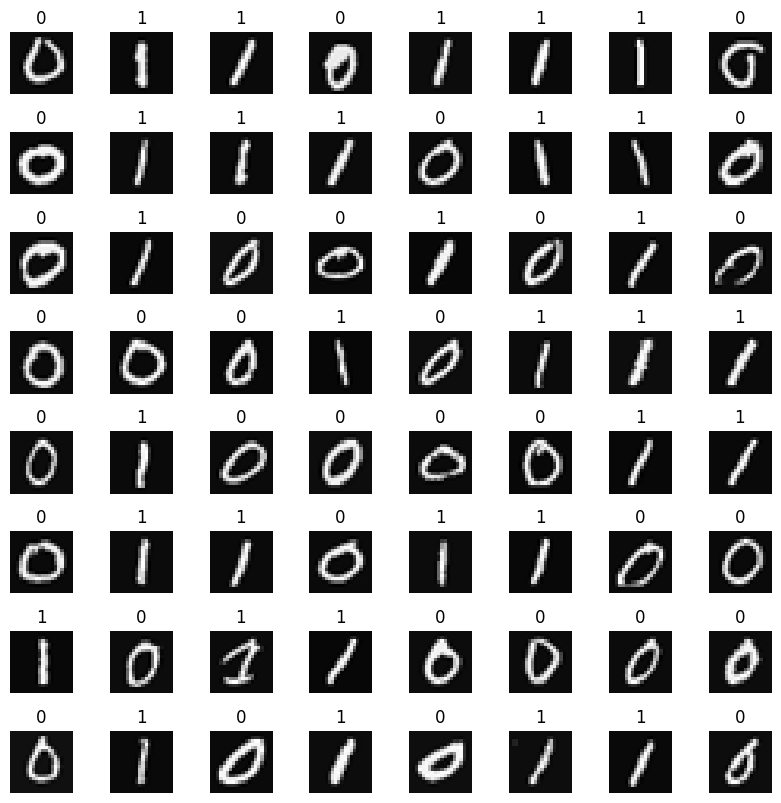

In [11]:
X = np.load("./data/digit_0_1_X.npy")
real_y = np.load("./data/digit_0_1_y.npy")  # 数据只有0，1两类，所以期望输出页只有一个数（0或1），real_y实际上是个一维向量
X = X[:1000]
real_y = real_y[:1000] #前一千个是0和1，后面是其他数字

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(real_y[random_index,0])
    ax.set_axis_off()

接下来生成模型并训练

In [27]:
neural_network = NeuralNetwork(4, [400, 25, 15, 1])
# 这个模型的参数也是我从网课里面搬过来的，隐层有两层，第一层25个神经元，第二层15个神经元

neural_network.train(X, real_y, 0.001, 20)

第 1 个epoch训练完成
第 2 个epoch训练完成
第 3 个epoch训练完成
第 4 个epoch训练完成
第 5 个epoch训练完成
第 6 个epoch训练完成
第 7 个epoch训练完成
第 8 个epoch训练完成
第 9 个epoch训练完成
第 10 个epoch训练完成
第 11 个epoch训练完成
第 12 个epoch训练完成
第 13 个epoch训练完成
第 14 个epoch训练完成
第 15 个epoch训练完成
第 16 个epoch训练完成
第 17 个epoch训练完成
第 18 个epoch训练完成
第 19 个epoch训练完成
第 20 个epoch训练完成


接下来预测一下结果，看看正确率

In [29]:
ans_multilayer_perceptron = neural_network.predict(X)

# 预测结果是sigmoid函数的值，是0-1之间的实数，这里我们把0.5设为阈值来判断两类
for i in range(ans_multilayer_perceptron.shape[0]):
    if ans_multilayer_perceptron[i] < 0.5:
        ans_multilayer_perceptron[i] = 0
    else:
        ans_multilayer_perceptron[i] = 1
print("正确率：", 1 - np.sum(abs(ans_multilayer_perceptron - real_y)) / X.shape[0])

正确率： 0.993


可以看到这个神经网络正确率非常的高，证明我们的算法实现是正确的